In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from statistics import mean
import matplotlib.pyplot as plt
import aux_Func as aux_Func

Definimos las constantes

In [2]:
# MACROS
NDATASETS = 10
N_TRAIN_SAMPLES = 15
NLAMDAS = 40

Creamos las listas que usaremos a la hora de generar los datos

In [3]:
DataMatrix = [ []*2 for i in range(NDATASETS)]
matrixDatasetTraintest =  [ []*4 for i in range(NDATASETS)]
matrixXYtrainparts =  [[[]*2 for j in range(N_TRAIN_SAMPLES)] for i in range(NDATASETS)]

In [4]:
DataMatrix = aux_Func.createDatasetRegression(NDATASETS, linear=True, nSamples=10000, nFeatures=1000, noise=700, n_informative = 500)

In [5]:
for i in range(NDATASETS):
    X_train, X_test, y_train, y_test = train_test_split(DataMatrix[i][0], DataMatrix[i][1], random_state=4, test_size=0.3439, shuffle=True)
    matrixDatasetTraintest[i].extend((X_train, X_test, y_train, y_test))

In [6]:
listTrainSamples = np.logspace(6, 8, num=N_TRAIN_SAMPLES, base=3)
listTrainSamples = [round(item, 0) for item in listTrainSamples]
listTrainSamples

[729.0,
 853.0,
 998.0,
 1167.0,
 1366.0,
 1598.0,
 1869.0,
 2187.0,
 2559.0,
 2993.0,
 3502.0,
 4097.0,
 4793.0,
 5608.0,
 6561.0]

In [7]:
for i in range(NDATASETS):
    for idx, el in enumerate(listTrainSamples):
        XtrainDivided = matrixDatasetTraintest[i][0][0:int(el)]
        
        YtrainDivided = matrixDatasetTraintest[i][2][0:int(el)]
        matrixXYtrainparts[i][idx].extend((XtrainDivided, YtrainDivided))

In [8]:
alpha_dict ={'alpha':np.logspace(0, 4, num=NLAMDAS, base=10)}
alpha_dict

{'alpha': array([1.00000000e+00, 1.26638017e+00, 1.60371874e+00, 2.03091762e+00,
        2.57191381e+00, 3.25702066e+00, 4.12462638e+00, 5.22334507e+00,
        6.61474064e+00, 8.37677640e+00, 1.06081836e+01, 1.34339933e+01,
        1.70125428e+01, 2.15443469e+01, 2.72833338e+01, 3.45510729e+01,
        4.37547938e+01, 5.54102033e+01, 7.01703829e+01, 8.88623816e+01,
        1.12533558e+02, 1.42510267e+02, 1.80472177e+02, 2.28546386e+02,
        2.89426612e+02, 3.66524124e+02, 4.64158883e+02, 5.87801607e+02,
        7.44380301e+02, 9.42668455e+02, 1.19377664e+03, 1.51177507e+03,
        1.91448198e+03, 2.42446202e+03, 3.07029063e+03, 3.88815518e+03,
        4.92388263e+03, 6.23550734e+03, 7.89652287e+03, 1.00000000e+04])}

# Ridge Regression

## Ejecutamos el algoritmo

In [9]:
ridge_regressors = []
#matrixRidgeResults =  [[[[]*2 for i in range(25)] for j in range(NSAMPLES)] for i in range(NDATASETS)]
matrixRidgeResults = np.zeros([NDATASETS,N_TRAIN_SAMPLES,NLAMDAS,2])


# Creamos los diferentes ridge regressors
for alpha in alpha_dict.get('alpha'):
    ridge_regressors.append(Ridge(alpha=float(alpha)))


for i in range(NDATASETS):
    for j in range(len(listTrainSamples)):
        for idx, ridge_regressor in enumerate(ridge_regressors):
            
            ridge_regressor.fit(matrixXYtrainparts[i][j][0], matrixXYtrainparts[i][j][1])
            y_pred = ridge_regressor.predict(matrixDatasetTraintest[i][1])
            
            #matrixRidgeResults[i][j][idx].extend((ridge_regressor.alpha, r2_score(matrixDatasetTraintest[i][3], y_pred)))
            matrixRidgeResults[i][j][idx][0] = ridge_regressor.alpha
            matrixRidgeResults[i][j][idx][1] = r2_score(matrixDatasetTraintest[i][3], y_pred)

In [10]:
np.save('matrices/matrixRidgeResults', matrixRidgeResults)

In [11]:
matrixRidgeResults = np.load('matrices/matrixRidgeResults.npy')

## Visualizamos los resultados

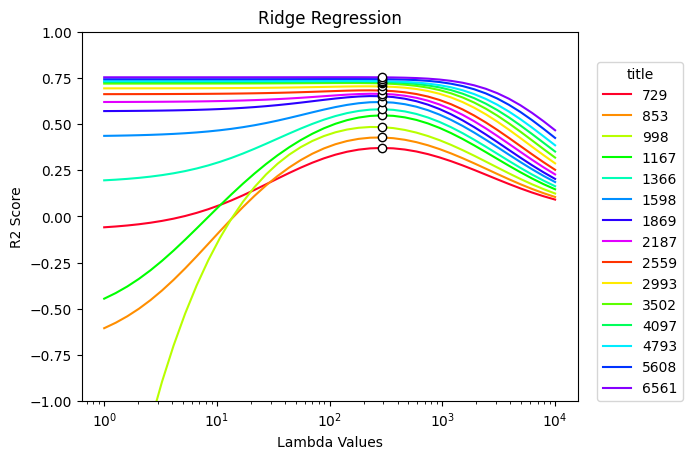

In [31]:
alphas = alpha_dict.get('alpha')

#r2_scores = [ []*25 for i in range(NSAMPLES)]
r2_scores = np.zeros([N_TRAIN_SAMPLES, NLAMDAS])

#MatrixRidgeResultsInvertida =  [[[]*2 for j in range(NSAMPLES)] for i in range(25)]
MatrixRidgeResultsInvertida = np.zeros([NLAMDAS, N_TRAIN_SAMPLES, 2])

num_dataset = 2

for i_sample in range(N_TRAIN_SAMPLES):
    for i_alphavalue in range(NLAMDAS):
        for i_dataset in range(NDATASETS):
            listR2ScoreDataset = []
            listR2ScoreDataset.append(matrixRidgeResults[i_dataset][i_sample][i_alphavalue][1])
            MatrixRidgeResultsInvertida[i_alphavalue][i_sample][0] = matrixRidgeResults[i_dataset][i_sample][i_alphavalue][0]
            MatrixRidgeResultsInvertida[i_alphavalue][i_sample][1] = mean(listR2ScoreDataset)



for idx_sample in range(N_TRAIN_SAMPLES):
    for idx_alphavalue in range(NLAMDAS):
        r2_scores[idx_sample][idx_alphavalue] = MatrixRidgeResultsInvertida[idx_alphavalue][idx_sample][1]


f, ax = plt.subplots(1)

ax.set_ylim(ymin=-1)
cm = plt.get_cmap('gist_rainbow')
ax.set_prop_cycle('color', [cm(1.*i/15) for i in range(N_TRAIN_SAMPLES)])

plt.xscale('log')
plt.title("Ridge Regression")
plt.xlabel("Lambda Values")
plt.ylabel("R2 Score")
for i_sample in range(N_TRAIN_SAMPLES):
    plt.plot(alphas, r2_scores[i_sample], label = str(int(listTrainSamples[i_sample])))
    maxValue = np.amax(r2_scores[i_sample])
    i_maxValue = np.where(r2_scores[4] == 0.5793415623558145)
    plt.plot(alphas[i_maxValue][0], maxValue, marker = "o", markeredgecolor = "black", markerfacecolor="white")
plt.legend(loc=(1.04, 0),title="NSamples")
plt.show(f)

In [28]:
alphas[0]

1.0

In [20]:
maxValue = np.amax(r2_scores[4])
maxValue

0.5793415623558145

In [17]:
i_maxValue = np.where(r2_scores[4] == 0.5793415623558145)

In [18]:
i_maxValue

(array([24], dtype=int64),)

In [21]:
alphas[i_maxValue][0]

289.4266124716752

In [22]:
alphas[24][0]

IndexError: invalid index to scalar variable.